In [1]:
#!pip install sumy

In [2]:
#!pip install gensim==3.4.0

In [3]:
#!pip install rouge

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from rouge import Rouge

from gensim.summarization import summarize
import sumy

import re
import html
from bs4 import BeautifulSoup

C:\Users\Alexey\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
data_match_news = pd.read_csv("ods_match_news.csv")
data_broadcasts = pd.read_csv("ods_broadcasts_201905301157.csv")

In [6]:
#Изменение типов столбцов у датафреймов
data_match_news = data_match_news.astype({'body': np.str})
data_broadcasts = data_broadcasts.astype({'content': np.str})

In [7]:
data_match_news

,id,name,ctime,body,match_id
0,7005921,Зико: &laquo;Задача может быть только одна: пр...,2009-02-18 01:06:26,<p>Главный тренер ЦСКА Зико поделился мыслями ...,18936
1,7005943,Текстовые онлайны матчей &#171;Зенит&#187; &#1...,2009-02-18 01:08:20,<p>Сегодня на Sports.ru дебютируют текстовые о...,18935
2,7005943,Текстовые онлайны матчей &#171;Зенит&#187; &#1...,2009-02-18 01:08:20,<p>Сегодня на Sports.ru дебютируют текстовые о...,18936
3,7006022,Стилян Петров: &laquo;ЦСКА выиграл все матчи в...,2009-02-18 01:21:55,<p>Полузащитник &#171;Астон Виллы&#187; Стилян...,18936
4,7006398,Хиддинк постетит матч &laquo;Астон Виллы&raquo...,2009-02-18 03:17:23,<p>Главный тренер сборной России и &#171;Челси...,18936
...,...,...,...,...,...
92992,1040645221,Петр Чех: Если бы пропустил от Денисова — это ...,2016-06-02 14:44:24,"<p class=""text"">Голкипер сборной Чехии Петр Че...",1095139
92993,1040648050,"Конор Шери: &laquo;Кросби сказал, что выиграет...",2016-06-02 16:17:07,"<p>Форвард <a class=""link-news2tags"" href=""htt...",1104866
92994,1040648436,Сидни Кросби: &laquo;Победным голом мы больше ...,2016-06-02 16:29:35,"<p>Капитан <a class=""link-news2tags"" href=""htt...",1104866
92995,1040653602,Джастин Браун: &laquo;Питтсбург&raquo; все нас...,2016-06-02 19:36:29,<p>Защитник «Сан-Хосе» Джастин Браун оценил хо...,1104866


In [8]:
data_broadcasts

,match_id,team1,team2,name,match_time,type,minute,content,message_time
0,18925,Локомотив,Химки,Россия. Премьер-лига,1237037400,NaN,0,"Добрый день! Sports.ru поздравляет всех, кто п...",1237034763
1,18925,Локомотив,Химки,Россия. Премьер-лига,1237037400,NaN,0,"Будем надеяться, что признаков пресловутого ""в...",1237034996
2,18925,Локомотив,Химки,Россия. Премьер-лига,1237037400,NaN,0,"Что ж, сегодняшних соперников можно назвать од...",1237035202
3,18925,Локомотив,Химки,Россия. Премьер-лига,1237037400,NaN,0,Зимой подмосковный клуб едва не исчез с футбол...,1237035415
4,18925,Локомотив,Химки,Россия. Премьер-лига,1237037400,NaN,0,"""Локомотив"" зимой старался стать лучше. В сост...",1237035796
...,...,...,...,...,...,...,...,...,...
722062,1104866,Питтсбург,Сан-Хосе,Кубок Стэнли,1464825600,empty,63,"<b>2:1 - ""Питтсбург"" выигрывает второй финальн...",1464837758
722063,1104866,Питтсбург,Сан-Хосе,Кубок Стэнли,1464825600,empty,63,"Очевидно, что залог успеха ""Питтсбурга"" - иниц...",1464837879
722064,1104866,Питтсбург,Сан-Хосе,Кубок Стэнли,1464825600,empty,63,"Другими словами, ДеБур должен в первую очередь...",1464838029
722065,1104866,Питтсбург,Сан-Хосе,Кубок Стэнли,1464825600,empty,63,Большое спасибо за чтение! До новых встреч на ...,1464838220


In [9]:
#Предобработка данных
#Удаление \n \r \t. Удаление html разметки и замена мнемоник html

regex = re.compile(r'[\n\r\t]')

data_match_news['name'] = data_match_news['name'].apply(lambda x: BeautifulSoup(html.unescape(regex.sub(" ", x)), 'lxml').text)
data_match_news['body'] = data_match_news['body'].apply(lambda x: BeautifulSoup(html.unescape(regex.sub(" ", x)), 'lxml').text)

data_broadcasts['content'] = data_broadcasts['content'].apply(lambda x: BeautifulSoup(html.unescape(regex.sub(" ", x)), 'lxml').text)

C:\Users\Alexey\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.youtube.com/watch?v=kjp249A6O2s" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\Alexey\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://vine.co/v/ehzVWHWm6eK" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\Alexey\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://vk.com/video-28639294_171533531" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

Группировка данных по матч_ид. Для новостей подсчитаем количество предложений, для трансляций - количество символов в трансляции. Базовая идея - объединенные заголовки новостей обобщают трансляцию матча.

In [10]:
data_all_name_news = data_match_news.sort_values(['match_id', 'ctime'], ascending = True).groupby(['match_id']).agg(count_sentences=('match_id', 'count'), name=('name', lambda x: '. '.join(x).lower().strip())).reset_index()
data_all_name_news

,match_id,count_sentences,name
0,18925,14,три тысячи сотрудников милиции будут следить з...
1,18935,33,"текстовые онлайны матчей «зенит» – «штутгарт»,..."
2,18936,22,зико: «задача может быть только одна: пройти в...
3,18941,15,"харри реднапп: «это просто безумие, как плотно..."
4,18956,26,"дик адвокат: «и «зенит», и «штутгарт» завтра б..."
...,...,...,...
7666,1104438,15,чемпионат россии. ответные переходные матчи. «...
7667,1104439,7,информация об объединении фк «динамо» и махачк...
7668,1104440,5,чемпионат россии. ответные переходные матчи. «...
7669,1104865,26,"нхл. 17 экспертов сайта лиги из 21 считают, чт..."


In [11]:
data_all_name_news.values[0]

array([18925, 14,
       'три тысячи сотрудников милиции будут следить за обеспечением порядка во время матча «спартак» – «зенит». текстовый онлайн матча «атлетик» – «реал» – на sports.ru. премьер-лига. 1-й тур. «терек» обыграл «спартак» из нальчика, цска разгромил на выезде «сатурн», «спартак» сыграл вничью с «зенитом» и другие матчи. дюрица получил травму в игре с «химками». константин сарсания: «если бы выпустил второго нападающего раньше, может, мы бы и не пропустили». рашид рахимов: «результат матча с «химками» закономерным назвать не могу». константин сарсания: «ничья – хороший результат во встрече с такой сильной командой, как «локомотив»». рашид рахимов: «вижу, что команда играет в совершенно другой футбол». дюрицу отвезли в больницу во время матча с «химками». антипенко получил травму в матче с «локомотивом». марек чех: «мы должны были выигрывать». роман березовский: «рад, что мы наконец-то стартовали с ничьей, а не с поражения, как в последние годы». томислав дуймович: «газон

In [12]:
data_all_text_broadcasts = data_broadcasts.sort_values(['match_id','message_time'], ascending = True).groupby(['match_id'])['content'].apply(lambda x: ''.join(x).lower().strip()).reset_index()
data_all_text_broadcasts

,match_id,content
0,18925,"добрый день! sports.ru поздравляет всех, кто п..."
1,18935,"матчем со ""штутгартом"" ""зенит"" открывает европ..."
2,18936,"интересный парадокс жребия - армейцам, единств..."
3,18941,приветствуем всех любителей самой популярной и...
4,18956,"ответный матч 1/16 финала кубка уефа ""зенита"" ..."
...,...,...
8776,1104438,привет. теперь точно – сегодня последний тур р...
8777,1104439,всем привет! стыковые матчи за право выступать...
8778,1104440,всем привет! сегодня важный день для российско...
8779,1104865,"привет всем, кто не представляет своей жизни б..."


In [13]:
data_all_text_broadcasts.values[0]

array([18925,
       'добрый день! sports.ru поздравляет всех, кто прошедшей зимой с нетерпением считал дни до старта российской премьер-лиги. наша первая текстовая трансляция чемпионата 2009 поможет вам проследить за событиями, который произойдут на стадионе "локомотив", где одноименная команда принимает гостей из "химок". будем надеяться, что признаков пресловутого "весеннего" футбола на "локомотиве" сегодня будет меньше, нежели на других аренах страны. погода в москве солнечная, почти тепло, да и стадион принято называть лучшим в стране, а это значит, что газон должен быть в порядке. что ж, сегодняшних соперников можно назвать одними из самых загадочных команд сезона. но загадочность проявляетя в них совершенно по-разному. если болельщики хозяев верят, что кризисные времена ушли в прошлое, и команда в этом году наконец-то отважится на чемпионский выстрел, то химкинские поклонники пока находятся в полном неведении. зимой подмосковный клуб едва не исчез с футбольной карты, но затем ми

In [14]:
data_all_text_broadcasts['len_content'] = data_all_text_broadcasts['content'].str.len()

Уберем слишком маленькие и слишком большие текстовые трансляции. 

In [15]:
data_all_text_broadcasts.describe()

,match_id,len_content
count,8.781000e+03,8781.000000
mean,6.445001e+05,8589.082337
std,3.464657e+05,2547.902258
min,1.892500e+04,3.000000
25%,3.066130e+05,6837.000000
50%,7.860660e+05,8229.000000
75%,9.661490e+05,10141.000000
max,1.104866e+06,28358.000000


C:\Users\Alexey\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='len_content', ylabel='Density'>

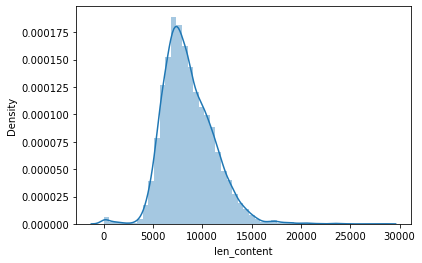

In [16]:
sns.distplot(data_all_text_broadcasts['len_content'])

In [17]:
value_left_quantile = data_all_text_broadcasts['len_content'].quantile(0.01)
value_right_quantile = data_all_text_broadcasts['len_content'].quantile(0.99)
print(value_left_quantile)
print(value_right_quantile)

4022.0
15464.600000000024


In [18]:
data_all_text_broadcasts = data_all_text_broadcasts[(data_all_text_broadcasts.len_content >= value_left_quantile) & (data_all_text_broadcasts.len_content <= value_right_quantile)]
data_all_text_broadcasts.describe()

,match_id,len_content
count,8.605000e+03,8605.000000
mean,6.477633e+05,8563.039279
std,3.453606e+05,2266.784450
min,1.892500e+04,4023.000000
25%,3.101650e+05,6860.000000
50%,7.861810e+05,8229.000000
75%,9.662180e+05,10096.000000
max,1.104866e+06,15458.000000


Аналогично ограничим новости о матчах.

In [19]:
data_all_name_news.describe()

,match_id,count_sentences
count,7.671000e+03,7671.000000
mean,6.360590e+05,12.123191
std,3.372260e+05,11.354686
min,1.892500e+04,1.000000
25%,3.066420e+05,5.000000
50%,7.681270e+05,9.000000
75%,9.630095e+05,15.000000
max,1.104866e+06,127.000000


C:\Users\Alexey\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count_sentences', ylabel='Density'>

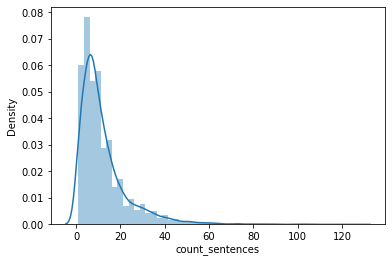

In [20]:
sns.distplot(data_all_name_news['count_sentences'])

In [21]:
value_left_quantile = data_all_name_news['count_sentences'].quantile(0.01)
value_right_quantile = data_all_name_news['count_sentences'].quantile(0.99)
print(value_left_quantile)
print(value_right_quantile)

1.0
55.0


In [22]:
data_all_name_news = data_all_name_news[(data_all_name_news.count_sentences >= value_left_quantile) & (data_all_name_news.count_sentences <= value_right_quantile)]
data_all_name_news.describe()

,match_id,count_sentences
count,7.595000e+03,7595.000000
mean,6.367178e+05,11.534826
std,3.374117e+05,9.648112
min,1.892500e+04,1.000000
25%,3.066645e+05,5.000000
50%,7.684380e+05,9.000000
75%,9.630175e+05,15.000000
max,1.104866e+06,55.000000


In [23]:
# Оставляем трансляции с новостями и новости с трансляциями
data_all_name_news = data_all_name_news[data_all_name_news['match_id'].isin(data_all_text_broadcasts['match_id'].values)]
data_all_text_broadcasts = data_all_text_broadcasts[data_all_text_broadcasts['match_id'].isin(data_all_name_news['match_id'].values)]

In [24]:
data_all_name_news

,match_id,count_sentences,name
0,18925,14,три тысячи сотрудников милиции будут следить з...
1,18935,33,"текстовые онлайны матчей «зенит» – «штутгарт»,..."
2,18936,22,зико: «задача может быть только одна: пройти в...
3,18941,15,"харри реднапп: «это просто безумие, как плотно..."
4,18956,26,"дик адвокат: «и «зенит», и «штутгарт» завтра б..."
...,...,...,...
7666,1104438,15,чемпионат россии. ответные переходные матчи. «...
7667,1104439,7,информация об объединении фк «динамо» и махачк...
7668,1104440,5,чемпионат россии. ответные переходные матчи. «...
7669,1104865,26,"нхл. 17 экспертов сайта лиги из 21 считают, чт..."


In [25]:
data_all_text_broadcasts

,match_id,content,len_content
0,18925,"добрый день! sports.ru поздравляет всех, кто п...",8142
1,18935,"матчем со ""штутгартом"" ""зенит"" открывает европ...",9031
2,18936,"интересный парадокс жребия - армейцам, единств...",12288
3,18941,приветствуем всех любителей самой популярной и...,11507
4,18956,"ответный матч 1/16 финала кубка уефа ""зенита"" ...",7986
...,...,...,...
8776,1104438,привет. теперь точно – сегодня последний тур р...,4742
8777,1104439,всем привет! стыковые матчи за право выступать...,4197
8778,1104440,всем привет! сегодня важный день для российско...,6607
8779,1104865,"привет всем, кто не представляет своей жизни б...",13885


In [26]:
# Количество предложений в сгенерированном резюме. Необходимо для алгоритмов 
count_sentences = int(data_all_name_news['count_sentences'].mean())

In [27]:
#arr_summ_textrank = {}
#for i, row in data_all_text_broadcasts.iterrows():
#    arr_summ_textrank[row['match_id']] = summarize(row['content'])

In [28]:
#arr_summ_textrank[18925]

In [29]:
#data_match_news[data_match_news["match_id"] == 18925].sort_values(by=["ctime"])[['name', 'body']].values

In [30]:
#Подсчет значения метрики

In [31]:
import nltk
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.sum_basic import SumBasicSummarizer
from sumy.summarizers.kl import KLSummarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alexey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Алгоритм TextRank

In [32]:
textrank_summarizer = TextRankSummarizer()

arr_summ_textrank = {}
for i, row in data_all_text_broadcasts.iterrows():
    parser = PlaintextParser.from_string(row['content'], Tokenizer("ru"))
    arr_summ_textrank[row['match_id']] = " ".join(str(x) for x in textrank_summarizer(parser.document, count_sentences))

In [33]:
#sorted(arr_summ_textrank.values(), key=lambda x: x[0])
#["".join(item) for item in data_all_name_news.sort_values(by=['match_id'])['name'].astype(str)]
rouge = Rouge()
rouge.get_scores(sorted(arr_summ_textrank.values(), key=lambda x: x[0]), ["".join(item) for item in data_all_name_news.sort_values(by=['match_id'])['name'].astype(str)], avg=True)

{'rouge-1': {'r': 0.12485539391981706,
  'p': 0.0400401575980471,
  'f': 0.05474170959544029},
 'rouge-2': {'r': 0.004449886384699357,
  'p': 0.0013503148031200742,
  'f': 0.0018511561348051218},
 'rouge-l': {'r': 0.12086640782381868,
  'p': 0.03860592038768841,
  'f': 0.05282430781956723}}

In [34]:
print(arr_summ_textrank[18925])
print()
print(data_all_name_news[data_all_name_news['match_id'] == 18925]['name'].values[0])

погода в москве солнечная, почти тепло, да и стадион принято называть лучшим в стране, а это значит, что газон должен быть в порядке. если болельщики хозяев верят, что кризисные времена ушли в прошлое, и команда в этом году наконец-то отважится на чемпионский выстрел, то химкинские поклонники пока находятся в полном неведении. дуймович, получив мяч на левом фланге, мог сделать отличный пас на сычева в центр.  получилось в недодачу. кожанов проникает в дыру, образовавшуюся в защите "локомотива", но его с ног валит родолфо. более того, в створ ворот чеха был нанесен лишь один удар, который и обратился в гол. "локомотив" выжал из себя одиннадцать ударов, однако в "единичку" на табло не обратился ни один из них. глушаков!денис, сыграв в стенку с одемвинги, мягко катнул мяч в ворота. не забывайте, что в окне с flash, где вы видите расстановки, есть другие вкладки с интересными данными да уж, хозяева не ищут легких путей...первую замену делает сарсания. вместо кожанова выходит низамутдинов.ф

Алгоритм LexRank

In [35]:
lexrank_summarizer = LexRankSummarizer()

arr_summ_lexrank = {}
for i, row in data_all_text_broadcasts.iterrows():
    parser = PlaintextParser.from_string(row['content'], Tokenizer("ru"))
    arr_summ_lexrank[row['match_id']] = " ".join(str(x) for x in lexrank_summarizer(parser.document, count_sentences))

In [36]:
rouge.get_scores(sorted(arr_summ_lexrank.values(), key=lambda x: x[0]), ["".join(item) for item in data_all_name_news.sort_values(by=['match_id'])['name'].astype(str)], avg=True)

{'rouge-1': {'r': 0.10227152063620581,
  'p': 0.05691817975197267,
  'f': 0.06382731508379956},
 'rouge-2': {'r': 0.002287811092167607,
  'p': 0.0012977044439013033,
  'f': 0.0014255188673621254},
 'rouge-l': {'r': 0.0996629471492736,
  'p': 0.05531968089223027,
  'f': 0.06207191874899093}}

In [37]:
print(arr_summ_lexrank[18925])
print()
print(data_all_name_news[data_all_name_news['match_id'] == 18925]['name'].values[0])

sports.ru поздравляет всех, кто прошедшей зимой с нетерпением считал дни до старта российской премьер-лиги. стопроцентный момент на 34-й был у давида муджири. муджири метров с 20 ковырнул мяч прямо в руки березовскому. травмированного дюрицу меняет фининьо. момент у сычева! надо отметить, что в этот момент хавбека окружали три защитника "химок". а у "химок" пилипчук меняет антипенко. дуймович приложился по ногам никифорова. штурма пока нет. сейчас будет опасный штрафной в сторону ворот березовского. одемвинги, находясь прямо в центре штрафной, не придумал ничего лучше, чем откатить мяч в район центрального круга.

три тысячи сотрудников милиции будут следить за обеспечением порядка во время матча «спартак» – «зенит». текстовый онлайн матча «атлетик» – «реал» – на sports.ru. премьер-лига. 1-й тур. «терек» обыграл «спартак» из нальчика, цска разгромил на выезде «сатурн», «спартак» сыграл вничью с «зенитом» и другие матчи. дюрица получил травму в игре с «химками». константин сарсания: «ес

Алгоритм Luhn

In [38]:
luhn_summarizer = LuhnSummarizer()

arr_summ_luhn = {}
for i, row in data_all_text_broadcasts.iterrows():
    parser = PlaintextParser.from_string(row['content'], Tokenizer("ru"))
    arr_summ_luhn[row['match_id']] = " ".join(str(x) for x in luhn_summarizer(parser.document, count_sentences))

In [39]:
rouge.get_scores(sorted(arr_summ_luhn.values(), key=lambda x: x[0]), ["".join(item) for item in data_all_name_news.sort_values(by=['match_id'])['name'].astype(str)], avg=True)

{'rouge-1': {'r': 0.12182992318444603,
  'p': 0.042029989582523276,
  'f': 0.056103641965044},
 'rouge-2': {'r': 0.0035719730049415394,
  'p': 0.0011996739918990953,
  'f': 0.0016032228127546824},
 'rouge-l': {'r': 0.11822842034975607,
  'p': 0.0406698409324232,
  'f': 0.05431670449675208}}

In [40]:
print(arr_summ_luhn[18925])
print()
print(data_all_name_news[data_all_name_news['match_id'] == 18925]['name'].values[0])

наша первая текстовая трансляция чемпионата 2009 поможет вам проследить за событиями, который произойдут на стадионе "локомотив", где одноименная команда принимает гостей из "химок". если болельщики хозяев верят, что кризисные времена ушли в прошлое, и команда в этом году наконец-то отважится на чемпионский выстрел, то химкинские поклонники пока находятся в полном неведении. а не было там никого.одемвинги мог выскочить один-на-один, однако березовский своим выходом из ворот отпугнул форварда. муджири метров с 20 ковырнул мяч прямо в руки березовскому. более того, в створ ворот чеха был нанесен лишь один удар, который и обратился в гол. "локомотив" выжал из себя одиннадцать ударов, однако в "единичку" на табло не обратился ни один из них. крайний защитник "локо" отправил мяч выше ворот с трех метров. сейчас будет опасный штрафной в сторону ворот березовского. он легко уходит от фининьо и бьет в ближний угол. одемвинги, находясь прямо в центре штрафной, не придумал ничего лучше, чем отка

Алгоритм Lsa

In [41]:
lsa_summarizer = LsaSummarizer()

arr_summ_lsa = {}
for i, row in data_all_text_broadcasts.iterrows():
    parser = PlaintextParser.from_string(row['content'], Tokenizer("ru"))
    arr_summ_lsa[row['match_id']] = " ".join(str(x) for x in lsa_summarizer(parser.document, count_sentences))

In [42]:
rouge.get_scores(sorted(arr_summ_lsa.values(), key=lambda x: x[0]), ["".join(item) for item in data_all_name_news.sort_values(by=['match_id'])['name'].astype(str)], avg=True)

{'rouge-1': {'r': 0.11664893285868756,
  'p': 0.04614847093772216,
  'f': 0.05962627424881139},
 'rouge-2': {'r': 0.0024394939701548823,
  'p': 0.0010816061337030106,
  'f': 0.00133847232567135},
 'rouge-l': {'r': 0.11348277150454571,
  'p': 0.04475501271229273,
  'f': 0.05787091706753968}}

In [43]:
print(arr_summ_lsa[18925])
print()
print(data_all_name_news[data_all_name_news['match_id'] == 18925]['name'].values[0])

sports.ru поздравляет всех, кто прошедшей зимой с нетерпением считал дни до старта российской премьер-лиги. наша первая текстовая трансляция чемпионата 2009 поможет вам проследить за событиями, который произойдут на стадионе "локомотив", где одноименная команда принимает гостей из "химок". зимой подмосковный клуб едва не исчез с футбольной карты, но затем минимальный прожиточный минимум клуба премьер-лиги все-таки удалось отыскать. но болельщики красно-зеленых, узнав о сопричастности указанных лиц к красно-белым цветам, попросили организаторов вычеркнуть их номера из праздничной программы. гимн российской федерации!на верхнем ярусе одной из центральных трибун, мягко говоря, не аншлаг. начинаем!центральные защитники "локо" подарили момент антипенко, который вежливо от него отказался, вернув мяч хозяевам. а не было там никого.одемвинги мог выскочить один-на-один, однако березовский своим выходом из ворот отпугнул форварда. что ж такое, ведь начало матча только.янбаев теряет позицию там, 

Алгоритм SumBasic

In [44]:
sumbasic_summarizer = SumBasicSummarizer()

arr_summ_sumbasic = {}
for i, row in data_all_text_broadcasts.iterrows():
    parser = PlaintextParser.from_string(row['content'], Tokenizer("ru"))
    arr_summ_sumbasic[row['match_id']] = " ".join(str(x) for x in sumbasic_summarizer(parser.document, count_sentences))

In [45]:
rouge.get_scores(sorted(arr_summ_sumbasic.values(), key=lambda x: x[0]), ["".join(item) for item in data_all_name_news.sort_values(by=['match_id'])['name'].astype(str)], avg=True)

{'rouge-1': {'r': 0.0842421778832228,
  'p': 0.09054463563677399,
  'f': 0.0755349627357089},
 'rouge-2': {'r': 0.0008954306494151882,
  'p': 0.0012623317617445954,
  'f': 0.0008884868383136045},
 'rouge-l': {'r': 0.08229976751658494,
  'p': 0.08849937285988463,
  'f': 0.07378845740722531}}

In [46]:
print(arr_summ_sumbasic[18925])
print()
print(data_all_name_news[data_all_name_news['match_id'] == 18925]['name'].values[0])

стартовый свисток. это дуймович искал кого-то из нападающих. муджири и глушаков бестолково разыграли угловой. николаев показывает, что пенальти не будет. муджири метров с 20 ковырнул мяч прямо в руки березовскому. низамутдинов в запасе. а чуть ранее "локомотив" плохо разыграл штрафной удар. березовский очень надежен. момент у сычева! штурма пока нет. на этом все!

три тысячи сотрудников милиции будут следить за обеспечением порядка во время матча «спартак» – «зенит». текстовый онлайн матча «атлетик» – «реал» – на sports.ru. премьер-лига. 1-й тур. «терек» обыграл «спартак» из нальчика, цска разгромил на выезде «сатурн», «спартак» сыграл вничью с «зенитом» и другие матчи. дюрица получил травму в игре с «химками». константин сарсания: «если бы выпустил второго нападающего раньше, может, мы бы и не пропустили». рашид рахимов: «результат матча с «химками» закономерным назвать не могу». константин сарсания: «ничья – хороший результат во встрече с такой сильной командой, как «локомотив»». раш

Алгоритм KL

In [47]:
kl_summarizer = KLSummarizer()

arr_summ_kl = {}
for i, row in data_all_text_broadcasts.iterrows():
    parser = PlaintextParser.from_string(row['content'], Tokenizer("ru"))
    arr_summ_kl[row['match_id']] = " ".join(str(x) for x in kl_summarizer(parser.document, count_sentences))

In [48]:
rouge.get_scores(sorted(arr_summ_kl.values(), key=lambda x: x[0]), ["".join(item) for item in data_all_name_news.sort_values(by=['match_id'])['name'].astype(str)], avg=True)

{'rouge-1': {'r': 0.08157982963117427,
  'p': 0.04895418627759412,
  'f': 0.05409745710154796},
 'rouge-2': {'r': 0.00212734311118233,
  'p': 0.0012852831343440187,
  'f': 0.0014040372761222571},
 'rouge-l': {'r': 0.07952828243516627,
  'p': 0.04759786560734533,
  'f': 0.0526330048245494}}

In [49]:
print(arr_summ_kl[18925])
print()
print(data_all_name_news[data_all_name_news['match_id'] == 18925]['name'].values[0])

будем надеяться, что признаков пресловутого "весеннего" футбола на "локомотиве" сегодня будет меньше, нежели на других аренах страны. но загадочность проявляетя в них совершенно по-разному. если болельщики хозяев верят, что кризисные времена ушли в прошлое, и команда в этом году наконец-то отважится на чемпионский выстрел, то химкинские поклонники пока находятся в полном неведении. в состав были влиты ян дюрица, станислав иванов, олег кузьмин и томислав дуймович. кожанов бьет в упор, отправляя мяч выше ворот. дуймович, получив мяч на левом фланге, мог сделать отличный пас на сычева в центр.  получилось в недодачу. более того, в створ ворот чеха был нанесен лишь один удар, который и обратился в гол. вместо кожанова выходит низамутдинов.фининьо хотел выполнить навес со стандарта, но мяч пошел на метровой высоте и затрял в ногах "желтых". билялетдинов мощно запустил мяч в ближний угол. мяч посылается на левый фланг, откуда одемвинги приложился в соперника. рашид рахимов сейчас говорит, чт